The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


Male
United States of America
    decade  USA_winners
0     1900     0.017544
1     1910     0.075000
2     1920     0.074074
3     1930     0.250000
4     1940     0.302326
5     1950     0.291667
6     1960     0.265823
7     1970     0.317308
8     1980     0.319588
9     1990     0.403846
10    2000     0.422764
11    2010     0.314050
12    2020     0.360000
2000


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,USA_winners,decade,female_winner
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,False,1900,False
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,False,1900,False
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,False,1900,False
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,False,1900,False
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,False,1900,False


     category  decade  female_winner
0   Chemistry    1900       0.000000
1   Chemistry    1910       0.125000
2   Chemistry    1920       0.000000
3   Chemistry    1930       0.076923
4   Chemistry    1940       0.000000
..        ...     ...            ...
67    Physics    1980       0.000000
68    Physics    1990       0.000000
69    Physics    2000       0.000000
70    Physics    2010       0.038462
71    Physics    2020       0.166667

[72 rows x 3 columns]


,category,decade,female_winner
0,Chemistry,1900,0.000000
1,Chemistry,1910,0.125000
2,Chemistry,1920,0.000000
3,Chemistry,1930,0.076923
4,Chemistry,1940,0.000000


category         Literature
decade                 2020
female_winner           0.5
Name: 32, dtype: object
{2020: 'Literature'}


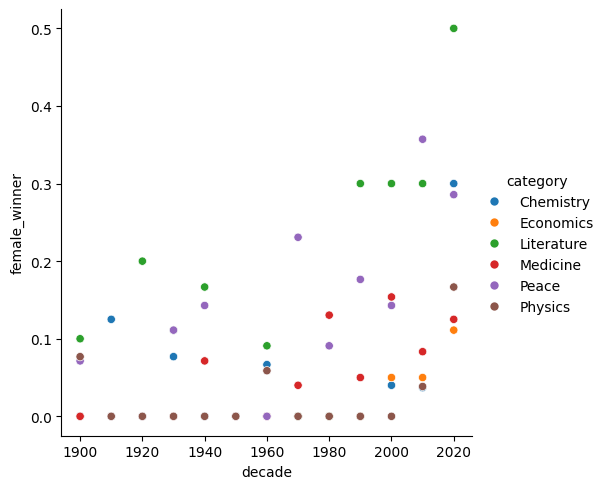

     year    category                                          full_name
19   1903     Physics                        Marie Curie, née Sklodowska
29   1905       Peace  Baroness Bertha Sophie Felicita von Suttner, n...
51   1909  Literature                      Selma Ottilia Lovisa Lagerlöf
62   1911   Chemistry                        Marie Curie, née Sklodowska
128  1926  Literature                                     Grazia Deledda
Marie Curie, née Sklodowska
Physics
Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Linus Carl Pauling                                                                   2
John Bardeen                                                                         2
Frederick Sanger                                                                     2
Marie Curie, née Sklodowska                                                          2
                                                                                    ..
Karl

In [5]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Start coding here!

nobel= pd.read_csv('data/nobel.csv')
display(nobel.head())

top_gender = nobel["sex"].value_counts().index[0]
print(top_gender)
top_country = nobel["birth_country"].value_counts().index[0]
print(top_country)

### Creating column with USA winners
nobel["USA_winners"] = nobel["birth_country"] == "United States of America"
### Creating decade column
nobel["decade"] = np.floor(nobel["year"] / 10)
nobel["decade"] = nobel["decade"] * 10
nobel["decade"] = nobel["decade"].astype("int64")

### Defining max decade with value_counts function
prop_usa_winners = nobel.groupby("decade", as_index = False)["USA_winners"].mean()
print(prop_usa_winners)
max_decade_usa = prop_usa_winners[prop_usa_winners["USA_winners"]==prop_usa_winners["USA_winners"].max()]["decade"].values[0]
print(max_decade_usa)

### Creating new column, where sex == Female
nobel["female_winner"] = nobel["sex"] == "Female"
display(nobel.head())

### Grouping by "category" and "decade" to get a summary of female winners
sum_stats = nobel.groupby(["category","decade"], as_index = False)["female_winner"].mean()
print(sum_stats)
display(sum_stats.head())
### Finding most succesful categories for female winners
max_female_pair = sum_stats.loc[sum_stats["female_winner"].idxmax()]
print(max_female_pair)
max_female_dict = {max_female_pair["decade"] : max_female_pair["category"]}
print(max_female_dict)

### Visualizing data with seaborn plot
sns.relplot(data=sum_stats,x="decade",y="female_winner",hue="category")
plt.show()


### Creating Pd.Series with years, where female is winner 
woman_pd = nobel.loc[nobel["female_winner"] == True, ["year","category","full_name"]]
woman_df = pd.DataFrame(woman_pd)
print(woman_df.head())
#### Choosing first element from "full_name" column
first_woman_name = woman_df["full_name"].iat[0]
print(first_woman_name)
### Choosing first element from "category" column
first_woman_category = woman_df["category"].iat[0]
print(first_woman_category)

### Determine repeat winners
###Count values in a column
repeat_winners = nobel["full_name"].value_counts()
print(repeat_winners)
### Finding counts of two and more
multiple_winners = repeat_winners[repeat_winners >= 2]
print(multiple_winners.head())
### Storing multiple winners to the list
repeat_list = list(multiple_winners.index)
print(repeat_list)

